# Набор данных CIFAR10
Набор данных CIFAR-10 состоит из 60000 цветных изображений размером 32x32 в 10 классах, по 6000 изображений в классе. Имеется 50000 обучающих изображений и 10000 тестовых изображений. Этот набор имеет 10 классов: автомобиль, самолет, птица, кот, олень, собака, лягуша, лошадь, корабль и грузовик

## Готовимся к работе
Подготавливаем данные и модули для обучения

  #### Импортирум модули

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  #### Создаем трансформер

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  #### Загружаем датасет

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


  #### Создаем классы
  порядок важен

In [4]:
classes = ('самолет', 'автомобиль', 'птица', 'кот',
           'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик')

  #### Создаем функцию для показа картинки, и выводим несколько штук

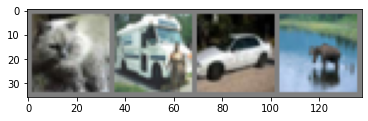

кот   грузовик автомобиль олень


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Создаем и обучаем нейросеть

  #### Создаем класс и модель нейросети

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = CNN()

  #### Создаем оптимизатор и функцию потерь

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

  #### Обучаем нейросеть

In [8]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'Эпоха: {epoch+1}, батч {i+1}, средняя ошибка: {running_loss / 2000:.3f}')
            running_loss = 0.0

    running_loss = 0.0

Эпоха: 1, батч 2000, средняя ошибка: 2.161
Эпоха: 1, батч 4000, средняя ошибка: 1.833
Эпоха: 1, батч 6000, средняя ошибка: 1.680
Эпоха: 1, батч 8000, средняя ошибка: 1.597
Эпоха: 1, батч 10000, средняя ошибка: 1.528
Эпоха: 1, батч 12000, средняя ошибка: 1.466
Эпоха: 2, батч 2000, средняя ошибка: 1.404
Эпоха: 2, батч 4000, средняя ошибка: 1.399
Эпоха: 2, батч 6000, средняя ошибка: 1.333
Эпоха: 2, батч 8000, средняя ошибка: 1.305
Эпоха: 2, батч 10000, средняя ошибка: 1.309
Эпоха: 2, батч 12000, средняя ошибка: 1.285


## Сохраняем и тестируем нейросеть

  #### Тестируем нейросеть

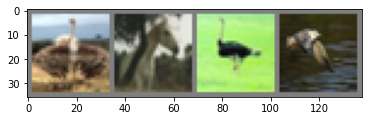

Предсказания нейросети:  птица лошадь птица птица


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('Предсказания нейросети: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

  #### Сохраняем её

In [11]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)